<a href="https://colab.research.google.com/github/varunfb/Llama/blob/main/Llama_3_Prompt_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

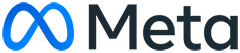

# **Prompt Engineering with Llama 3**
Our goal in this session is to provide a guided tour of Llama 3, including understanding different Llama 3 models, how and where to access them, Generative AI and Chatbot architectures, and Prompt Engineering. We'll present comparison examples of Llama 2 and Llama 3, and also cover resources for building more advanced Llama apps using RAG (Retrieval Augmented Generation), Fine-tuning, and Agents.

##**Prerequisites**
* Basic understanding of Large Language Models

* Basic understanding of Python

* Access to Github, GColab and Replicate

In [61]:
# presentation layer code

import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(Image(url="https://mermaid.ink/img/" + base64_string))

def genai_app_arch():
  mm("""
  flowchart TD
    A[Users] --> B(Applications e.g. mobile, web)
    B <--> |Hosted API|C(Platforms e.g. Custom, HuggingFace, Replicate, Together, Anyscale)
    B -- optional --> E(Frameworks e.g. LangChain or LlamaIndex)
    C-->|User Input|D[Llama 3]
    D-->|Model Output|C
    E --> C
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def rag_arch():
  mm("""
  flowchart TD
    A[User Prompts] --> B(Frameworks e.g. LangChain)
    B <--> |Database, Docs, XLS|C[fa:fa-database External Data]
    B -->|API|D[Llama 3]
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def llama3_family():
  mm("""
  graph LR;
      llama-3 --> llama-3-8b
      llama-3 --> llama-3-70b
      llama-3-8b --> llama-3-8b-base
      llama-3-8b --> llama-3-8b-instruct
      llama-3-70b --> llama-3-70b-base
      llama-3-70b --> llama-3-70b-instruct
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def apps_and_llms():
  mm("""
  graph LR;
    users --> apps
    apps --> frameworks
    frameworks --> platforms
    platforms --> Llama 2
    classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

import ipywidgets as widgets
from IPython.display import display, Markdown

# Create a text widget
API_KEY = widgets.Password(
    value='',
    placeholder='',
    description='API_KEY:',
    disabled=False
)

def md(t):
  display(Markdown(t))

def bot_arch():
  mm("""
  graph LR;
  user --> prompt
  prompt --> i_safety
  i_safety --> context
  context --> Llama_3
  Llama_3 --> output
  output --> o_safety
  i_safety --> memory
  o_safety --> memory
  memory --> context
  o_safety --> user
  classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def fine_tuned_arch():
  mm("""
  graph LR;
      Custom_Dataset --> Pre-trained_Llama
      Pre-trained_Llama --> Fine-tuned_Llama
      Fine-tuned_Llama --> RLHF
      RLHF --> |Loss:Cross-Entropy|Fine-tuned_Llama
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def load_data_faiss_arch():
  mm("""
  graph LR;
      documents --> textsplitter
      textsplitter --> embeddings
      embeddings --> vectorstore
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)

def mem_context():
  mm("""
      graph LR
      context(text)
      user_prompt --> context
      instruction --> context
      examples --> context
      memory --> context
      context --> tokenizer
      tokenizer --> embeddings
      embeddings --> LLM
      classDef default fill:#CCE6FF,stroke:#84BCF5,textColor:#1C2B33,fontFamily:trebuchet ms;
  """)


##**1 - Understanding Llama 3**

### **1.1 - What is Llama 3?**

* State of the art (SOTA), Open Source LLM
* 8B, 70B
* Choosing model: Size, Quality, Cost, Speed
* Pretrained + Chat
* [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)

In [2]:
llama3_family()

### **1.2 - Accessing Llama 3**
* Download + Self Host (i.e. [download Llama](https://ai.meta.com/resources/models-and-libraries/llama-downloads))
* Hosted API Platform (e.g. [Replicate](https://replicate.com/meta/meta-llama-3-8b-instruct), [Together](https://api.together.xyz/playground/language/meta-llama/Llama-3-8b-hf), [Anyscale](https://app.endpoints.anyscale.com/playground))

* Hosted Container Platform (e.g. [Azure](https://techcommunity.microsoft.com/t5/ai-machine-learning-blog/introducing-llama-2-on-azure/ba-p/3881233), [AWS](https://aws.amazon.com/blogs/machine-learning/llama-2-foundation-models-from-meta-are-now-available-in-amazon-sagemaker-jumpstart/), [GCP](https://console.cloud.google.com/vertex-ai/publishers/google/model-garden/139))



### **1.3 - Use Cases of Llama 3**
* Content Generation
* Summarization
* General Chatbots
* RAG (Retrieval Augmented Generation): Chat about Your Own Data
* Fine-tuning
* Agents

## **2 - Using and Comparing Llama 3 and Llama 2**

In this notebook, we will use the Llama 2 7b chat and Llama 3 8b instruct models hosted on [Replicate](https://replicate.com/blog/run-llama-3-with-an-api?input=python). You'll need to first [sign in](https://replicate.com/signin) with your github account, then get an [API token](https://replicate.com/account/api-tokens) to try Replicate out for free.


### **2.1 - Install dependencies**

In [ ]:
!pip install replicate

### **2.2 - Create helpers for Llama 2 and Llama 3**

First, set your Replicate API token as environment variables.


In [ ]:
import os
from getpass import getpass

REPLICATE_API_TOKEN = getpass()

os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN

Create Llama 2 and Llama 3 helper functions - for chatbot type of apps, we'll use Llama 3 8b/70b instruct models, not the base models.

In [64]:
import replicate

def llama2(prompt, temperature=0.0, input_print=True):
  output = replicate.run(
    "meta/llama-2-7b-chat",
    input={
        "prompt": prompt,
        "max_tokens": 2048,
        "temperature": temperature})
  return "".join(output)

def llama3_8b(prompt, temperature=0.0):
  output = replicate.run(
    "meta/meta-llama-3-8b-instruct",
    input={
        "prompt": prompt,
        "max_tokens": 2048,
        "temperature": temperature})
  return "".join(output)

def llama3_70b(prompt, temperature=0.0):
  output = replicate.run(
    "meta/meta-llama-3-70b-instruct",
    input={
        "prompt": prompt,
        "max_tokens": 2048,
        "temperature": temperature})
  return "".join(output)

### **2.3 - Basic QA with Llama 2 and 3**

In [ ]:
prompt = "The typical color of Llama is: "
output = llama2(prompt)
md(output)

In [ ]:
output = llama3_8b(prompt)
md(output)

**Note: Llama 3 in not as chatty as Llama 2.**

### **2.4 - Changing temperature when calling Llama 3**

Temperature controls the randomness of LLM's output: with the values range from 0.0 for the most determinstic output to 1.0 for the most random output.

In [ ]:
output = llama3_8b(prompt, temperature=0.0)
md(output)

In [ ]:
output = llama3_8b(prompt, temperature=0.0)
md(output)

In [ ]:
output = llama3_8b(prompt, temperature=1.0)
md(output)

In [ ]:
output = llama3_8b(prompt, temperature=1.0)
md(output)

**Note: Two calls with temperature 0.0 give the exactly same results. Two calls with temperature 1.0 give wildly different answers.**

## **3 - Chat conversation**
* LLMs are stateless
* Single Turn
* Multi Turn (Memory)



In [74]:
bot_arch()

### **3.1 - Single-turn chat**

In [ ]:
prompt_chat = "What is the average lifespan of a Llama? Answer the question in few words."
output = llama2(prompt_chat)
md(output)

In [ ]:
output = llama3_8b(prompt_chat)
md(output)

In [ ]:
# example without previous context. LLM's are stateless and cannot understand "they" without previous context
prompt_chat = "What animal family are they? Answer the question in few words."
output = llama2(prompt_chat)
md(output)

In [ ]:
output = llama3_8b(prompt_chat)
md(output)

In [ ]:
output = llama3_70b(prompt_chat)
md(output)

**Note: Llama 3 70b doesn't hallucinate.**

### **3.2 - Multi-turn chat**
Chat app requires us to send in previous context to LLM to get in valid responses. Below is an example of Multi-turn chat.

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: 15-20 years.
User: What animal family are they?
"""
output = llama2(prompt_chat)
md(output)

In [ ]:
output = llama3_8b(prompt_chat)
md(output)

**Note: Llama 2 and 3 all behave well for using the chat history for follow up questions.**

### **3.3 - Multi-turn chat with more instruction**
Adding the instructon "Answer the question with one word" to see the difference of Llama 2 and 3.

In [ ]:
# example of multi-turn chat, with storing previous context
prompt_chat = """
User: What is the average lifespan of a Llama?
Assistant: Sure! The average lifespan of a llama is around 20-30 years.
User: What animal family are they?

Answer the question with one word.
"""
output = llama2(prompt_chat)
md(output)

In [ ]:
output = llama3_8b(prompt_chat)
md(output)

**Llama 3 follows instructions (e.g. "Answer the question one word") better!**

## **4 - Prompt Engineering**
* Prompt engineering refers to the science of designing effective prompts to get desired responses

* Helps reduce hallucination


#### **4.1 - In-Context Learning (e.g. Zero-shot, Few-shot)**
 * In-context learning - specific method of prompt engineering where demonstration of task are provided as part of prompt.
  1. Zero-shot learning - model is performing tasks without any
input examples.
  2. Few or “N-Shot” Learning - model is performing and behaving based on input examples in user's prompt.

In [ ]:
# Zero-shot example. To get positive/negative/neutral sentiment, we need to give examples in the prompt
prompt = '''
Classify: I saw a Gecko.
Sentiment: ?

Give one word response.
'''
output = llama2(prompt)
md(output)

In [ ]:
output = llama3_8b(prompt)
md(output)

**Note: Llama 3 has different opinions than Llama 2.**

In [ ]:
# By giving examples to Llama, it understands the expected output format.

prompt = '''
Classify: I love Llamas!
Sentiment: Positive
Classify: I dont like Snakes.
Sentiment: Negative
Classify: I saw a Gecko.
Sentiment:

Give one word response.
'''

output = llama2(prompt)
md(output)

In [ ]:
output = llama3_8b(prompt)
md(output)

**Note: Again, Llama 3 follows instructions better. Llama 2 now, with few shots, has the same output "Neutral" as Llama 3.**

In [ ]:
# another zero-shot learning
prompt = '''
QUESTION: Vicuna?
ANSWER:

Answer with one word.
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
output = llama3_70b(prompt)
md(output)

In [ ]:
# Another few-shot learning example with formatted prompt.

prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
output = llama3_70b(prompt)
md(output)

**Note: Llama 3 70b explains the answer.**

In [ ]:
# let's see if Llama 3 70b can just give the answer without explanation.
prompt = '''
QUESTION: Llama?
ANSWER: Yes
QUESTION: Alpaca?
ANSWER: Yes
QUESTION: Rabbit?
ANSWER: No
QUESTION: Vicuna?
ANSWER:

Answer with one word.
'''

output = llama3_70b(prompt)
md(output)

In [ ]:
# how about Llama 2
output = llama2(prompt)
md(output)

**Note: Clearly Llama 3 performing better than Llama 2!**

#### **4.2 - Chain of Thought**
"Chain of thought" enables complex reasoning through logical step by step thinking and generates meaningful and contextually relevant responses.

In [ ]:
# Standard prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?

Answer in one word.
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
output = llama3_70b(prompt)
md(output)

**Note: Llama 3-8b did not get the right answer because it was asked to answer in one word.**

In [ ]:
# By default, Llama 3 models follow "Chain-Of-Thought" prompting
prompt = '''
Llama started with 5 tennis balls. It buys 2 more cans of tennis balls. Each can has 3 tennis balls.
How many tennis balls does Llama have?
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
output = llama3_70b(prompt)
md(output)

**Note: By default, Llama 3 models identify word problems and solves it step by step!**

In [ ]:
# Another example of reasoning without asking for thinking step by step
prompt = '''
Who lived longer Newton or Einstein and by how many years?
Answer in a sentence.
'''

output = llama3_8b(prompt)
md(output)

**Note: Einstein's age was calculated incorrectly.**

In [ ]:
output = llama3_70b(prompt)
md(output)

**Note: Llama 2 often needs encourgement for step by step thinking to correctly reasoning. Llama 3 understands, reasons and explains better, making chain of thought unnecessary in the cases above.**

#### **4.3 - Knowledge Prompting**

 Knowledge prompting involves crafting a prompt or question that provides context, defines the task, and specifies the desired output. The goal is to "prompt" the AI to produce a relevant and accurate response.



In [ ]:
# knowledge prompting
prompt = '''
  Part of golf is trying to get a higher point total than others. Yes or No?
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
prompt = '''
Part of golf is trying to get a higher point total than others. Yes or No?
The objective of golf is to play a set of holes in the least number of strokes.

Explain your answer.
'''

output = llama3_8b(prompt)
md(output)

In [ ]:
prompt = '''
Part of golf is trying to get a higher point total than others. Yes or No?
'''

output = llama3_70b(prompt)
md(output)

**Note: Smaller models sometimes can be inaccurate. But by providing relevant context, they can perform as good as larger model.**

### **4.4 - Retrieval Augmented Generation (RAG)**
* Prompt Engineering Limitations - Knowledge cutoff & lack of specialized data

* Retrieval Augmented Generation(RAG) allows us to retrieve snippets of information from external data sources and augment it to the user's prompt to get tailored responses from Llama 3.





#### **4.4.1 - In-place RAG**
- A model's knowledge of the world ends at the moment of its training - so it won't know about more recent events.
- Llama 3 8B has cutoff date of March 2023, and Llama 3 70B December 2023, while Llama 2 September 2022.
- Ask the model about an event, in this case, FIFA Women's World Cup 2023, which started on July 20, 2023, and see how the model responses.

In [ ]:
prompt = '''
Today's date: April 22, 2024. Who won the 2023 Women's World Cup?
'''
output = llama2(prompt)
print(output)

In [ ]:
# cutoff date for 8B is March 2023.
output = llama3_8b(prompt)
print(output)

In [ ]:
# cutoff dte for 70B is December 2023
output = llama3_70b(prompt)
print(output)

**Note: Hmm, Llama 3 8b hallucinates due to lack of data. But 70b with cutoff date December 2023 is able to answer the question correctly.**

In [ ]:
context = """
The 2023 FIFA Women's World Cup was the ninth edition of the FIFA Women's World Cup, the quadrennial international women's
football championship contested by women's national teams and organised by FIFA. The tournament, which took place from
20 July to 20 August 2023, was jointly hosted by Australia and New Zealand.[2][3][4] It was the first FIFA Women's World Cup
with more than one host nation, as well as the first World Cup to be held across multiple confederations, as Australia is in the
Asian confederation, while New Zealand is in the Oceanian confederation. It was also the first Women's World Cup to be held
in the Southern Hemisphere.[5]
This tournament was the first to feature an expanded format of 32 teams from the previous 24, replicating the format used
for the men's World Cup from 1998 to 2022.[2] The opening match was won by co-host New Zealand, beating Norway at Eden Park
in Auckland on 20 July 2023 and achieving their first Women's World Cup victory.[6]
Spain were crowned champions after defeating reigning European champions England 1–0 in the final. It was the first time a
European nation had won the Women's World Cup since 2007 and Spain's first title, although their victory was marred by the
Rubiales affair. Spain became the second nation to win both the women's and men's World Cup since Germany in the 2003 edition.
[10] In addition, they became the first nation to concurrently hold the FIFA women's U-17, U-20, and senior World Cups.[11]
Sweden would claim their fourth bronze medal at the Women's World Cup while co-host Australia achieved their best placing yet,
finishing fourth.[12] Japanese player Hinata Miyazawa won the Golden Boot scoring five goals throughout the tournament. Spanish
player Aitana Bonmatí was voted the tournament's best player, winning the Golden Ball, whilst Bonmatí's teammate Salma
Paralluelo was awarded the Young Player Award. England goalkeeper Mary Earps won the Golden Glove, awarded to the best-performing
goalkeeper of the tournament.
Of the eight teams making their first appearance, Morocco were the only one to advance to the round of 16 (where they lost
to France; coincidentally, the result of this fixture was similar to the men's World Cup in Qatar, where France defeated
Morocco in the semi-final). The United States were the two-time defending champions,[13] but were eliminated in the round of
16 by Sweden, the first time the team had not made the semi-finals at the tournament, and the first time the defending
champions failed to progress to the quarter-finals.[14]
Australia's team, nicknamed the Matildas, performed better than expected, and the event saw many Australians unite to
support them. The Matildas, who beat France to make the semi-finals for the first time, saw record numbers of fans watching
their games, their 3–1 loss to England becoming the most watched television broadcast in Australian history, with an average
viewership of 7.13 million and a peak viewership of 11.15 million viewers.[18]
It was the most attended edition of the competition ever held.
"""

prompt = f"""
Given the following context, who won the 2023 Women's World cup?
context: {context}
"""
output = llama2(prompt)
print(output)

In [ ]:
output = llama3_8b(prompt)
print(output)

In [ ]:
output = llama3_70b(prompt)
print(output)

**Note: Llama 3 70b gives the best answer. Llama 2 fails.**

#### **4.3.2 - Decomposing Question**
Break down a complex question into sub questions to query RAG and Llama 3 with each sub question before getting the final answer from the sub questions and answers.

In [ ]:
prompt = """GENERAL INSTRUCTIONS
You are a domain expert. Your task is to break down a complex question into simpler sub-parts.

USER QUESTION
What's the revenue difference between Q1 of 2022 and Q2 of 2022?

ANSWER FORMAT
{"sub-questions":["<FILL>"]}"""

output = llama2(prompt)
md(output)


In [ ]:
output = llama3_8b(prompt)
md(output)

In [ ]:
output = llama3_70b(prompt)
md(output)

**Note: Llama 3 correctly breaks down a complex question according to the instruction. Llama 2 doesn't.**

#### **4.3.3 - Query a Doc using LangChain**
We'll show how to use LangChain, a framework for building non-trivial LLM apps, to build a RAG app.



In [56]:
rag_arch()

In [ ]:
# this won't be needed after langchain's new release with Replicate fix for Llama 3
!pip install git+https://github.com/langchain-ai/langchain.git#subdirectory=libs/community

!pip install langchain
!pip install sentence-transformers
!pip install faiss-cpu
!pip install bs4

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
import bs4

# Step 1: Load the document from a web url
loader = WebBaseLoader(["https://huggingface.co/blog/llama3"])
documents = loader.load()

# Step 2: Split the document into chunks with a specified chunk size
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
all_splits = text_splitter.split_documents(documents)

# Step 3: Store the document into a vector store with a specific embedding model
vectorstore = FAISS.from_documents(all_splits, HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))


In [ ]:
from langchain_community.llms import Replicate
llm = Replicate(
    model="meta/meta-llama-3-8b-instruct",
    model_kwargs={"temperature": 0.0, "top_p": 1, "max_new_tokens":500}
)

from langchain.chains import ConversationalRetrievalChain
chain = ConversationalRetrievalChain.from_llm(llm,
                                              vectorstore.as_retriever(),
                                              return_source_documents=True)

result = chain({"question": "What’s new with Llama 3?", "chat_history": []})
md(result['answer'])


There's a new way of building advanced RAG by using LangChain Expresssion Language. See [here](https://python.langchain.com/docs/use_cases/question_answering/quickstart/) for more info.

## **5 - Fine-Tuning Models**

* Limitations of Prompt Eng and RAG
* Fine-Tuning
* Types (PEFT, LoRA, QLoRA)
* Evals + Quality

* PyTorch for Pre-Training & Fine-Tuning


In [60]:
fine_tuned_arch()

### **5.1 - Types Of Fine-Tuning**

1. Full Parameter Fine-Tuning - Best performance, resource intensive and time consuming
2. PEFT (Parameter Efficient Fine-Tuning)

  2.1 - LoRA (Low Rank Adaptation)

  2.2 - QLoRA (Quantized LoRA)



### **5.2 - Examples of Fine-Tuning**

1. [Meta Llama Recipes](https://github.com/meta-llama/llama-recipes/tree/main/recipes/finetuning)
2. [Hugging Face fine-tuning with Llama 3](https://huggingface.co/blog/llama3#fine-tuning-with-%F0%9F%A4%97-trl)

## **6 - Responsible AI**

* Power + Responsibility
* Hallucination
* Input & Output Safety
* Red-teaming (simulating real-world cyber attackers)
* Review [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)



##**7 - Conclusion**
* Active research on LLMs and Llama
* Leverage the power of Llama and its open community (Github - 45k stars, 8k forks)
* Call-To-Action
  * Build a project using Llama!
  * Interested in contributing to Llama?


#### **Resources**
* [Meta Llama 3 Blog](https://ai.meta.com/blog/meta-llama-3/)
* [Getting Started with Meta Llama](https://llama.meta.com/docs/get-started)
- [Llama 3 repo](https://github.com/meta-llama/llama3)
- [Llama 3 model card](https://github.com/meta-llama/llama3/blob/main/MODEL_CARD.md)
- [LLama 3 Recipes repo](https://github.com/meta-llama/llama-recipes)
- [Responsible Use Guide](https://ai.meta.com/llama/responsible-use-guide/)
- [Acceptable Use Policy](https://ai.meta.com/llama/use-policy/)



#### **Author** - Varun Vontimitta, AI Partner Engineering Manager

1. LinkedIn - https://www.linkedin.com/in/varunvontimitta/
2. Github - https://github.com/varunfb/llama
